In [27]:
#we import the data of both Italy, Covid and new_regions
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook')

italy = gpd.read_file('./maps/italy-with-regions/reg2011_g.shp')
new_regions = pd.read_csv('./maps/italy-with-regions/reg2011_g.csv')
population = pd.read_csv('region_population.csv', index_col=0)
population.loc[16, 'Region'] = 'Trentino'
population.loc[15, 'Region'] = 'Friuli-Venezia Giulia'
population.loc[20, 'Region'] = 'Aosta'

estimates = pd.read_csv('italy_regional_estimates.csv')
estimates.rename(columns={'region': 'Region'}, inplace=True)
estimates.loc[15, 'Region'] = 'Trentino'
estimates.loc[14, 'Region'] = 'Friuli-Venezia Giulia'
estimates.loc[19, 'Region'] = 'Aosta'

In [28]:
# read values and re-format string data into floats
import numpy as np

vals = []
for s in estimates.loc[:, r'$\alpha_X$':].values.reshape(-1):
    vals.append(float(s.split(' ')[0]))
estimates.loc[:, r'$\alpha_X$':] = np.array(vals).reshape(estimates.loc[:, r'$\alpha_X$':].values.shape)

In [29]:
#We substitute the right column containing regions
italy['NOME_REG'] = new_regions['NOME_REG']
italy.rename(columns={'NOME_REG': 'Region', 'COD_REG': 'code'}, inplace=True)

In [36]:
#merging the two datasets
merge = italy.merge(population, on='Region', how='right')
merge = merge.merge(estimates, on='Region', how='right')
merge = merge.infer_objects()
merge.head()

,code,Region,SHAPE_Leng,SHAPE_Area,geometry,Population,$\alpha_X$,$\alpha_I$,$g_0$,$\tau_2$,CEI
0,1,Piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",4404246,9.9,500.0,1.27,2.9,0.89
1,2,Aosta,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5...",127329,11.0,497.0,1.55,1.6,0.88
2,3,Lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",10008349,10.8,498.0,1.31,2.5,0.89
3,4,Trentino,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5...",1059114,12.9,495.0,2.03,1.0,0.86
4,5,Veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",4915123,15.0,494.0,1.27,2.9,0.92


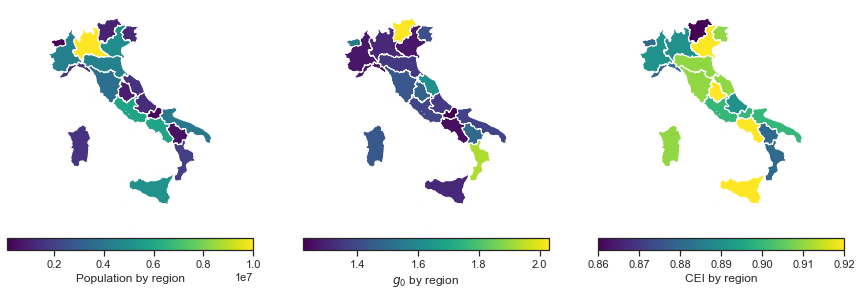

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
col = ['Population', r'$g_0$', 'CEI']
labels = ["Population by region", r'$g_0$ by region', 'CEI by region']

for i, ax in enumerate(axes):
    merge.plot(ax=ax,
           column=col[i],
           cmap='viridis',
           legend=True,
           categorical=False, 
           legend_kwds={'label': labels[i],
                        'orientation': "horizontal",
                        'pad': .0})
    
    sns.despine(ax=ax, left=True,bottom=True)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False) 